<a href="https://colab.research.google.com/github/AYUSH19VERMA/Pipeline-_Project/blob/Branch1/Mechanistic_Model_plots%20and%20results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib
from scipy.integrate import odeint

matplotlib.use('tkagg')


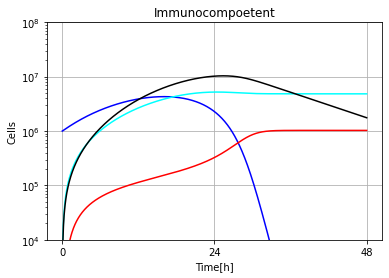

In [9]:
#Simulated short-term dynamics of response to A. fumigatus challenge in immunocompetent host with initial concentration of F given by Fo=1e6
#Result : Rate of deal fungal cells showed increase till around 24hr, and started decreasing(negative slope at RHS of 24hr) 
import matplotlib.pyplot as plt
y0 = [1e6, 0, 0, 0,]	
t = np.linspace(0, 48, 1000)
alpha = 0.0017
beta = 0.28
k_NF = 1.2e-6
d_MF = 0.32e-6
k_C = 0.38e-12
k_NC = 0.31e-6
delta_C = 0.066
delta_N = 1.2
delta_F = 0.090


params = [alpha, beta, k_NF, d_MF, k_C, k_NC, delta_C, delta_N, delta_F]

def sim(variables, t, params):
	F = variables[0]	
	C = variables[1]    
	N = variables[2]
	Fd = variables[3]    
	Nv =  150e6            
        
	M = 0.3e6       

	alpha = params[0]
	beta = params[1]
	k_NF = params[2]
	d_MF = params[3]
	k_C = params[4]
	k_NC = params[5]
	delta_C = params[6]
	delta_N = params[7]
	delta_F = params[8]


	dFdt = beta*F - k_NF*N*F - d_MF*M*F
	dCdt = k_C*M*F + k_NC*N - delta_C*C     
	dNdt = alpha*Nv*C - k_NF*N*F - delta_N*N 
	dFddt = k_NF*N*F + d_MF*M*F - delta_F*Fd

	return([dFdt, dCdt, dNdt, dFddt]) 


y = odeint(sim, y0, t, args=(params,))
a1 = y[:,0]
a2 = y[:,1]
a3 = y[:,2]
a4 = y[:,3]     

plt.plot(t, a1, color ='blue')
plt.plot(t,a2*1e6, color ='cyan')
plt.plot(t,a3, color ='red')
plt.plot(t,a4, color ='black')
plt.yscale("log",)
plt.ylim(1e4,1e8)
ticks1 = [0,24,48]
plt.xticks([0,24,48],ticks1)



plt.xlabel("Time[h]")
plt.ylabel("Cells")
plt.title("Immunocompoetent")

plt.grid()

plt.show()

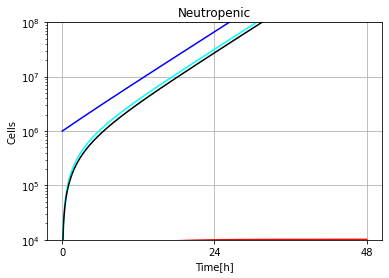

In [12]:
#Simulated short-term dynamics of response to A. fumigatus challenge in neutropenic hosts with initial concentration of F given by Fo=1e6
#Result : Rate of deal fungal cells found to be mimicking the rate of release of cytokines

import matplotlib.pyplot as plt
y0 = [1e6, 0, 0, 0,]	
t = np.linspace(0, 48, 1000)
alpha = 0.0017
beta = 0.28
k_NF = 1.2e-6
d_MF = 0.32e-6
k_C = 0.38e-12
k_NC = 0.31e-6
delta_C = 0.066
delta_N = 1.2
delta_F = 0.090


params = [alpha, beta, k_NF, d_MF, k_C, k_NC, delta_C, delta_N, delta_F]

def sim(variables, t, params):
	F = variables[0]	
	C = variables[1]    
	N = variables[2]
	Fd = variables[3]    
	Nv =  150e6*0.1          
        
	M = 0.3e6       

	alpha = params[0]
	beta = params[1]
	k_NF = params[2]
	d_MF = params[3]
	k_C = params[4]
	k_NC = params[5]
	delta_C = params[6]
	delta_N = params[7]
	delta_F = params[8]


	dFdt = beta*F - k_NF*N*F - d_MF*M*F
	dCdt = k_C*M*F + k_NC*N - delta_C*C     
	dNdt = alpha*Nv*C - k_NF*N*F - delta_N*N 
	dFddt = k_NF*N*F + d_MF*M*F - delta_F*Fd

	return([dFdt, dCdt, dNdt, dFddt]) 


y = odeint(sim, y0, t, args=(params,))
a1 = y[:,0]
a2 = y[:,1]
a3 = y[:,2]
a4 = y[:,3]     

plt.plot(t, a1, color ='blue')
plt.plot(t,a2*1e6, color ='cyan')
plt.plot(t,a3, color ='red')
plt.plot(t,a4, color ='black')
plt.yscale("log",)
plt.ylim(1e4,1e8)
ticks1 = [0,24,48]
plt.xticks([0,24,48],ticks1)



plt.xlabel("Time[h]")
plt.ylabel("Cells")
plt.title("Neutropenic")

plt.grid()

plt.show()